In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
df = pd.read_csv("churn.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.describe(include='object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


# Exploratory Data Analysis

In [10]:
# !pip install pandas_profiling

In [11]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

# Univariate Analysis

In [12]:
df.Exited[df['Exited']==1].count()

2037

In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<Axes: title={'center': 'Variable Exited'}, xlabel='Exited', ylabel='count'>

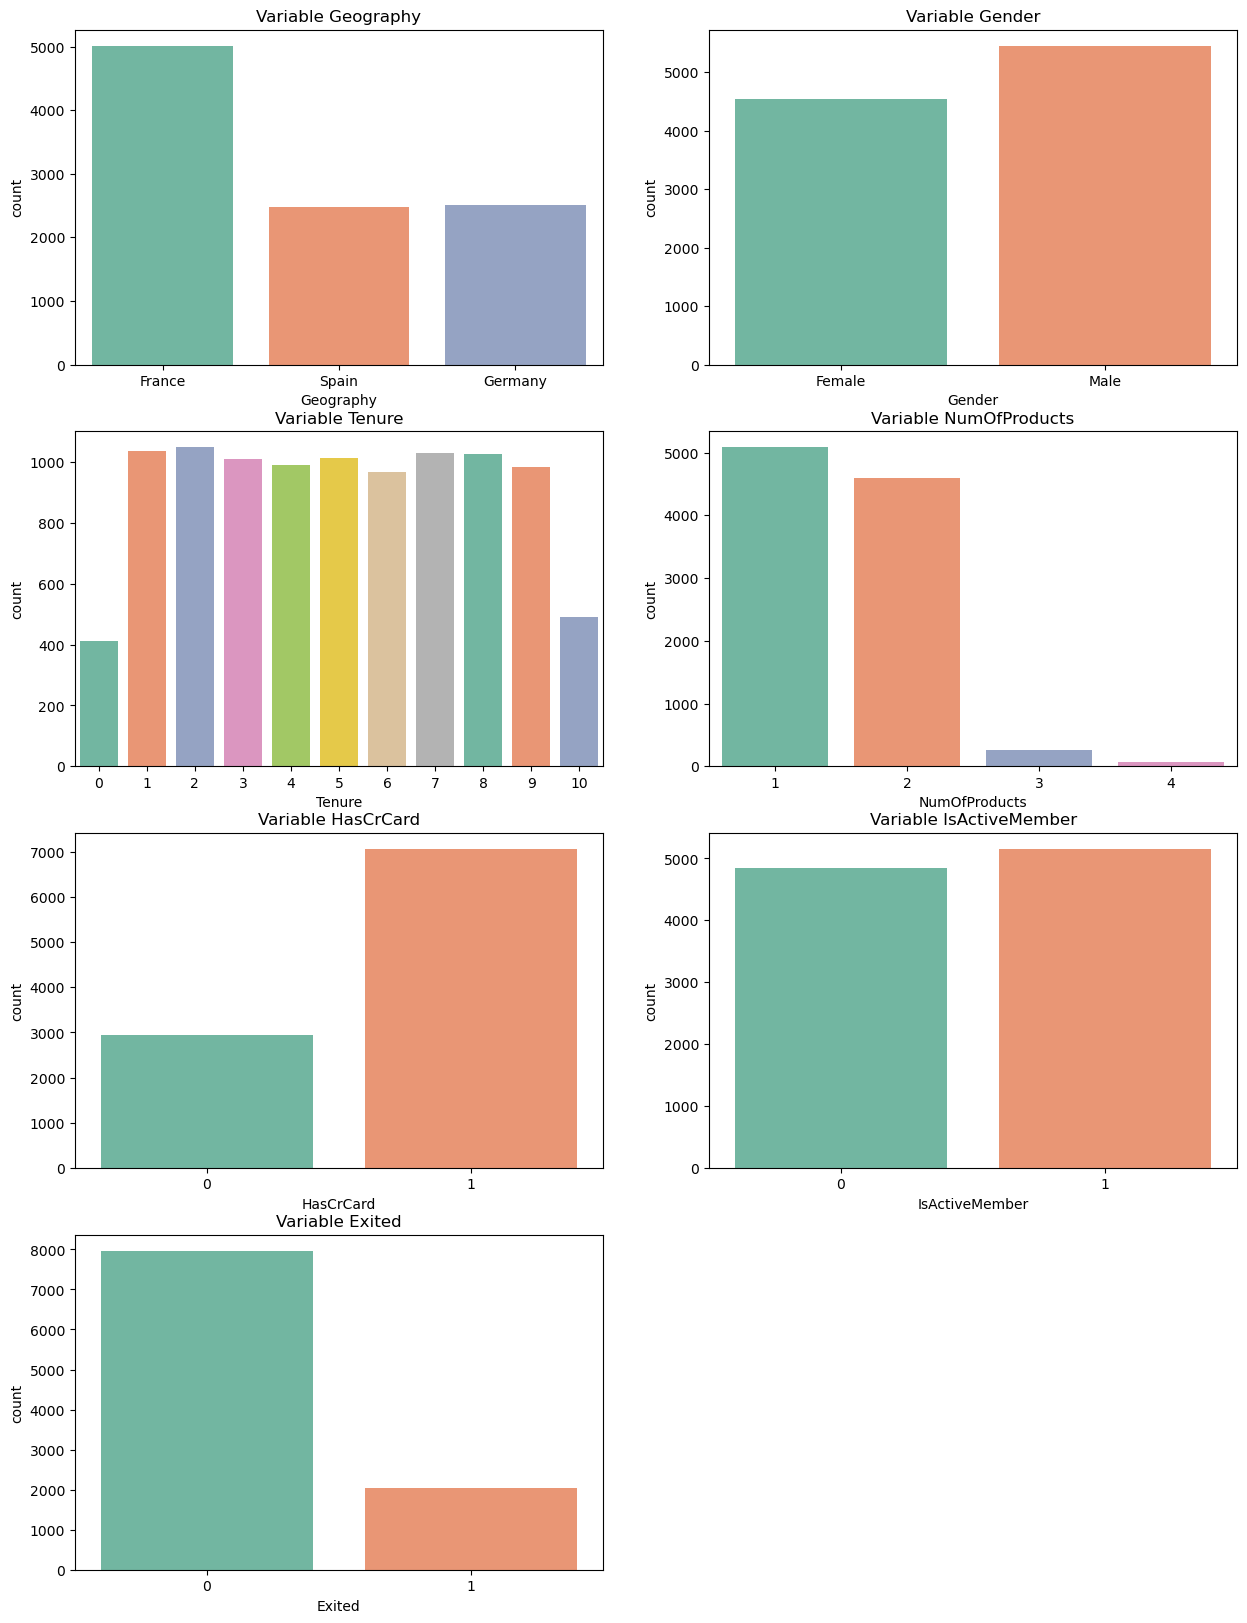

In [14]:
plt.figure(figsize = (15,20))

plt.subplot(4,2,1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', palette = 'Set2', data = df)

# Bivariate Analysis

<Axes: xlabel='Exited', ylabel='count'>

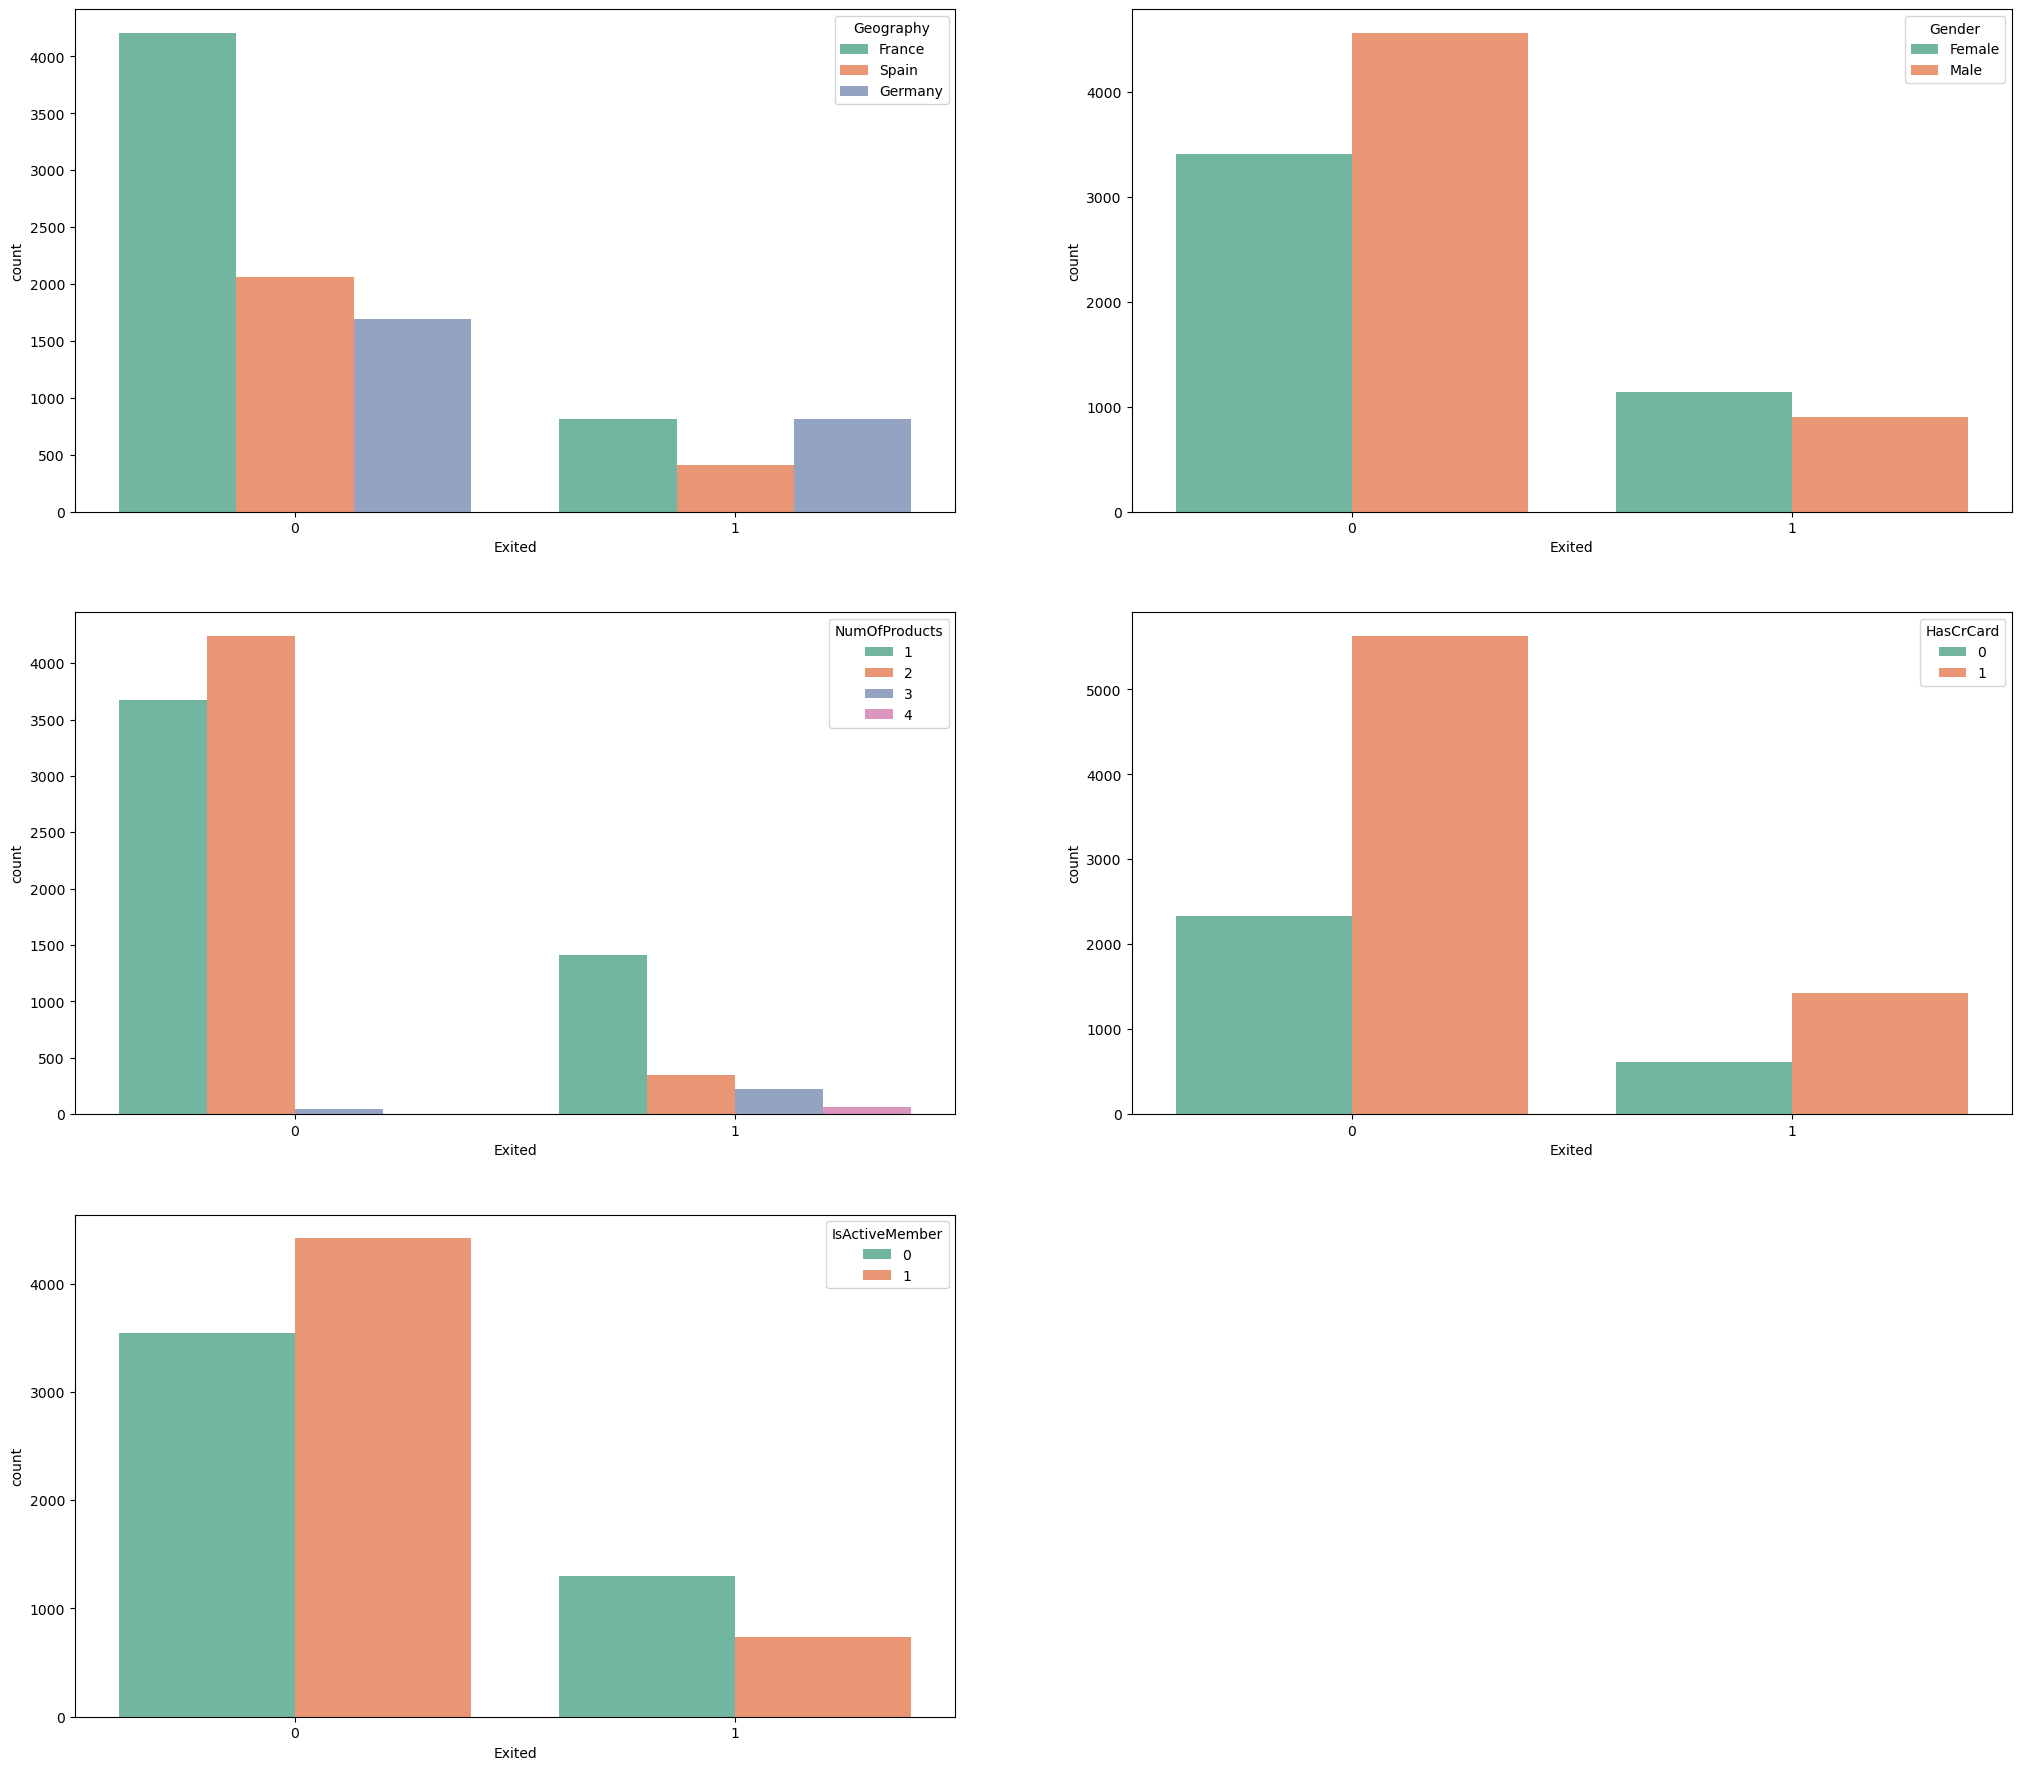

In [15]:
plt.figure(figsize = (25,30))

plt.subplot(4,2,1)
sns.countplot(x = 'Exited', hue = 'Geography', palette = 'Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'Exited', hue = 'Gender', palette = 'Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'Exited', hue = 'NumOfProducts', palette = 'Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'Exited', hue = 'HasCrCard', palette = 'Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'Exited', hue = 'IsActiveMember', palette = 'Set2', data = df)

<Axes: xlabel='Exited', ylabel='count'>

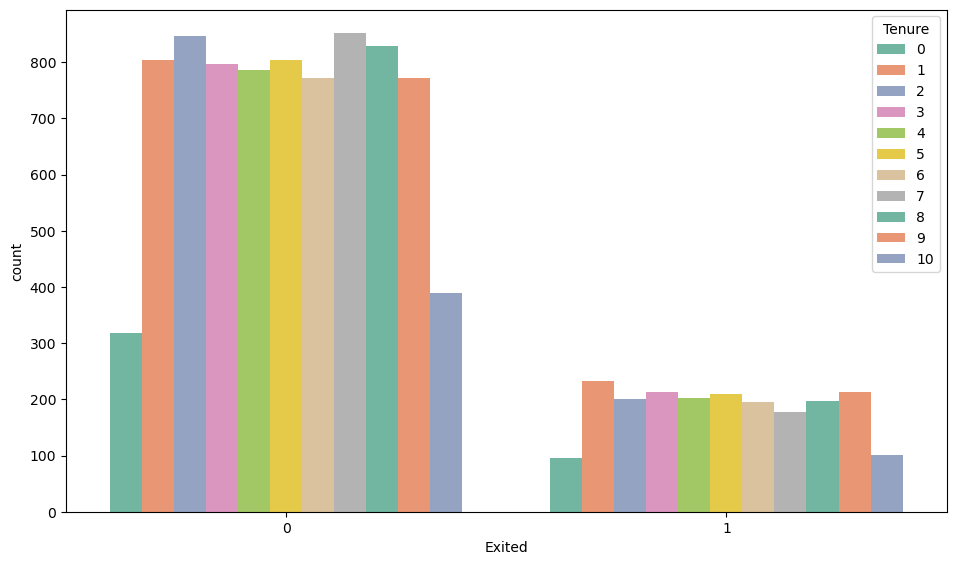

In [16]:
plt.figure(figsize = (25,30))
plt.subplot(4,2,1)
sns.countplot(x = 'Exited', hue = 'Tenure', palette = 'Set2', data = df)

# Data Preprocessing 

In [17]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [18]:
x = df.drop(columns=['Exited'])

In [19]:
y = df[['Exited']]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector

In [24]:
from sklearn import set_config
set_config(display='diagram')

In [25]:
from sklearn.metrics import classification_report

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
preprocessor = ColumnTransformer([
        ("num", StandardScaler(), selector(dtype_include="number")),
        ("cat", OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'), selector(dtype_include="object")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(random_state = 1, max_iter=1000))])


clf.fit(x_train, y_train)

output = clf.predict(x_test)

print(classification_report(output,y_test))

clf

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1835
           1       0.24      0.58      0.34       165

    accuracy                           0.81      2000
   macro avg       0.60      0.71      0.61      2000
weighted avg       0.90      0.81      0.84      2000



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B7DB08E7D0>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B7DB08E8F0>)])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=1))])

# Decision Tree 

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
preprocessor = ColumnTransformer([
        ("num", StandardScaler(), selector(dtype_include="number")),
        ("cat", OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'), selector(dtype_include="object")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())])


clf.fit(x_train, y_train)

output = clf.predict(x_test)

print(classification_report(output,y_test))

clf

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1549
           1       0.58      0.52      0.54       451

    accuracy                           0.81      2000
   macro avg       0.72      0.70      0.71      2000
weighted avg       0.80      0.81      0.80      2000



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B7DB2318D0>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B7DB231960>)])),
                ('classifier', DecisionTreeClassifier())])

## GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
preprocessor = ColumnTransformer([
        ("num", StandardScaler(), selector(dtype_include="number")),
        ("cat", OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'), selector(dtype_include="object")),])

params = { 'min_samples_split': [100, 200,270], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}


clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier",GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=10))])


clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_pred,y_test))

clf

Fitting 10 folds for each of 27 candidates, totalling 270 fits
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1747
           1       0.47      0.75      0.58       253

    accuracy                           0.86      2000
   macro avg       0.71      0.81      0.75      2000
weighted avg       0.90      0.86      0.87      2000



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B7DB233220>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B7DB2334C0>)])),
                ('classifier',
                 GridSearchCV(cv=10,
                              estimator=DecisionTreeClassifier(random_state=42),
                              param_grid={'max_depth': [3, 4, 6],
                                          'min_samples_leaf': [50, 70, 80],
                                          'min_samples_split': [100, 200, 270]},
                              verbose=1))])

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
preprocessor = ColumnTransformer([
        ("num", StandardScaler(), selector(dtype_include="number")),
        ("cat", OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'), selector(dtype_include="object")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())])


clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_pred,y_test))

clf

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1723
           1       0.51      0.75      0.61       277

    accuracy                           0.87      2000
   macro avg       0.74      0.82      0.76      2000
weighted avg       0.90      0.87      0.88      2000



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B7D40E4BE0>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B7D40E4C70>)])),
                ('classifier', RandomForestClassifier())])

## Hyperparameter Tunning

In [34]:
preprocessor = ColumnTransformer([
        ("num", StandardScaler(), selector(dtype_include="number")),
        ("cat", OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'), selector(dtype_include="object")),])


clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
    ("classifier", RandomForestClassifier(n_estimators=15, # make 15 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt"))])


clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_pred,y_test))

clf

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1934
           1       0.15      0.89      0.25        66

    accuracy                           0.82      2000
   macro avg       0.57      0.86      0.58      2000
weighted avg       0.97      0.82      0.88      2000



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B7D40E6710>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B7D40E6560>)])),
                ('classifier',
                 RandomForestClassifier(max_depth=4, min_samples_leaf=50,
                                        min_samples_split=100,
                                        n_estimators=15))])

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'), selector(dtype_exclude="number")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  KNeighborsClassifier(n_neighbors=3))])


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


clf.fit(x_train, y_train)

output = clf.predict(x_test)

print(classification_report(output,y_test))

clf

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1673
           1       0.48      0.59      0.53       327

    accuracy                           0.83      2000
   macro avg       0.70      0.73      0.71      2000
weighted avg       0.85      0.83      0.84      2000



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B7D40E7D00>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B7D40E5A80>)])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

# Pickling

In [37]:
import pickle

In [38]:
pickle.dump(df,open('df.pkl','wb'))

In [39]:
pickle.dump(clf,open('clf.pkl','wb'))

In [40]:
model = pickle.load(open('clf.pkl','rb'))

In [41]:
output = model.predict(df)

In [42]:
df2 = pd.DataFrame(output,columns=['prediction'])

In [43]:
df2

,prediction
0,0
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,1


In [44]:
df2 = pd.concat([df,df2],axis=1)

In [45]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,prediction
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1


In [46]:
df2['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [47]:
df2['prediction'].value_counts()

0    8430
1    1570
Name: prediction, dtype: int64

# Joblib

In [48]:
import joblib

In [49]:
joblib.dump(clf,'Customer_churn')

['Customer_churn']

In [50]:
model = joblib.load('Customer_churn')

In [51]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
output = model.predict(df)

In [53]:
df3 = pd.DataFrame(output,columns=['prediction'])

In [54]:
df3

,prediction
0,0
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,1


In [55]:
df3 =pd.concat([df,df3],axis=1)

In [56]:
df3

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,prediction
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1


In [57]:
df3['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [58]:
df3['prediction'].value_counts()

0    8430
1    1570
Name: prediction, dtype: int64

In [59]:
pd.crosstab(df3['Exited'],df3['prediction'])

prediction,0,1
Exited,,
0,7609,354
1,821,1216
